The code provides implementations of Temporal Difference (TD) learning for a simple 1D GridWorld environment. Here's a breakdown:

### Key Components:

1. **Environment (GridWorld):**
   - A linear environment with 5 states, including a terminal state.
   - Actions:
     - `0` = Move left.
     - `1` = Move right.
   - Reward:
     - A step incurs a reward of `-1`.
   - Terminal State:
     - Reaching state `4` ends the episode.

2. **Temporal Difference (TD) Learning:**
   - TD(0) is used to estimate the state-value function \( V(s) \) for each state.
   - Update rule:  
     \[
     V(s) \gets V(s) + \alpha \left( r + \gamma V(s') - V(s) \right)
     \]
   - Parameters:
     - `gamma`: Discount factor for future rewards.
     - `alpha`: Learning rate.

3. **Visualization:**
   - **Line plots** to track state-value updates across episodes.
   - **Bar plots** for state values at specific episodes.
   - **Heatmaps** using `seaborn` for state-value evolution.
   - **3D Surface plots** for an interactive view of value function changes.

### Execution Workflow:

1. **Environment Initialization:**
   - The `GridWorldEnv` class sets up the environment with states and actions.

2. **Learning Process:**
   - Episodes are executed, and the agent selects random actions.
   - State-value updates occur based on the TD(0) rule.
   - Visualization happens at defined intervals (`plot_interval`).

3. **Visual Insights:**
   - Heatmaps show the gradual stabilization of values across states.
   - 3D surface plots illustrate value changes over episodes.
   - Line and bar charts provide specific snapshots.

### To Execute:

Run the code in a Python environment with the following libraries installed:
- `numpy`
- `matplotlib`
- `seaborn`
- `plotly` (for interactive 3D plots)

### Enhancements:
- **Action Policy:** Replace the random policy with a more structured one (e.g., ε-greedy).
- **Dynamic Parameters:** Allow dynamic adjustment of `gamma` or `alpha`.
- **Environment Complexity:** Add obstacles, rewards, or extend the grid size.

Would you like to focus on improving the policy or exploring advanced techniques like Q-learning?

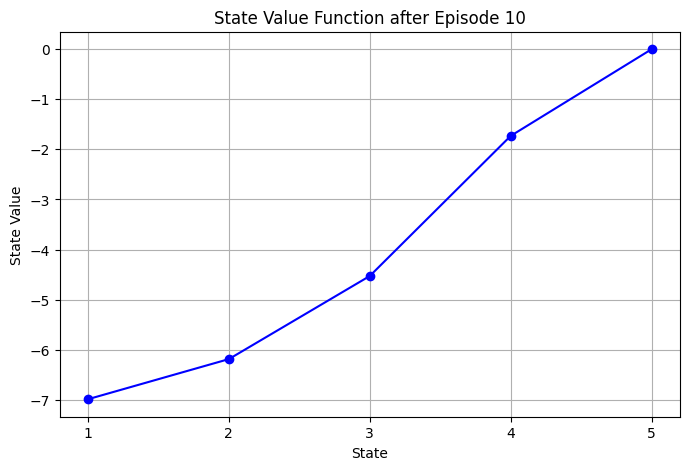

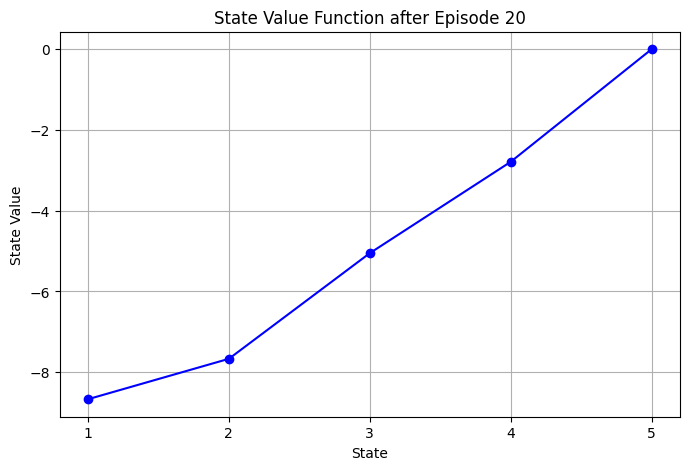

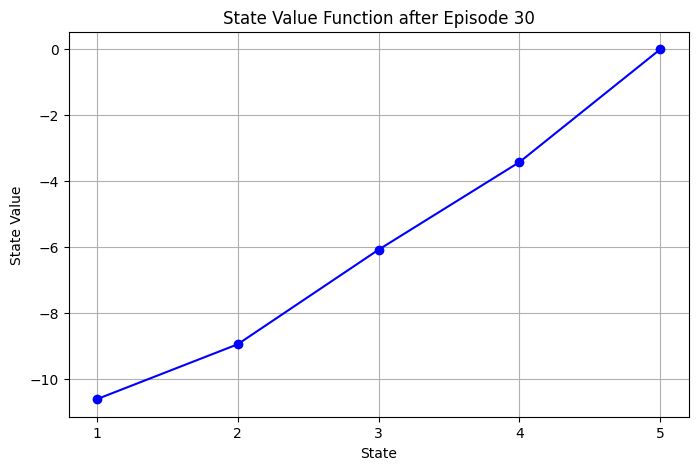

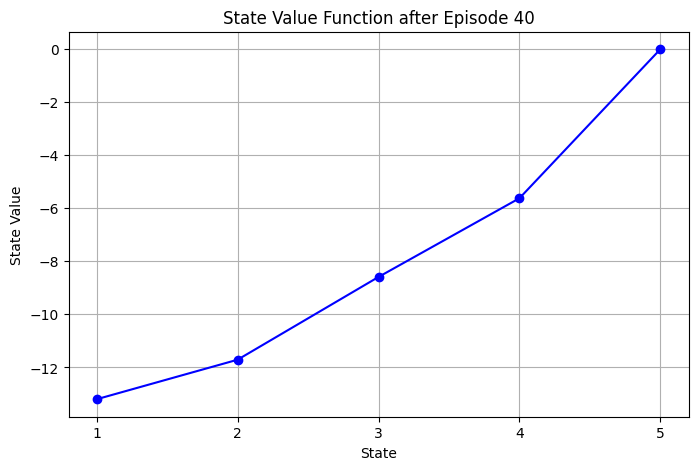

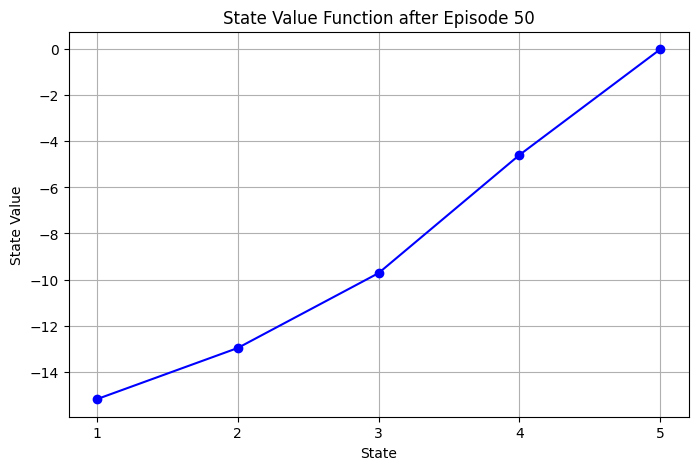

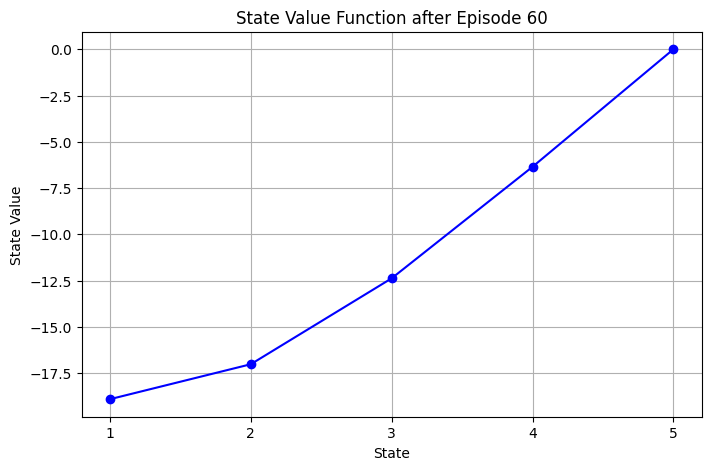

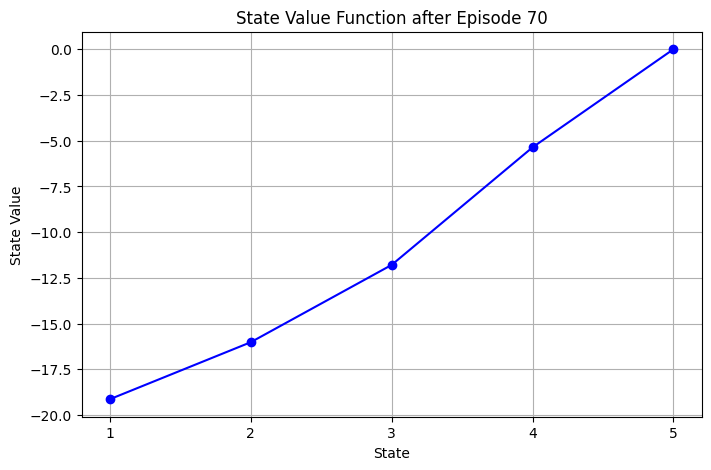

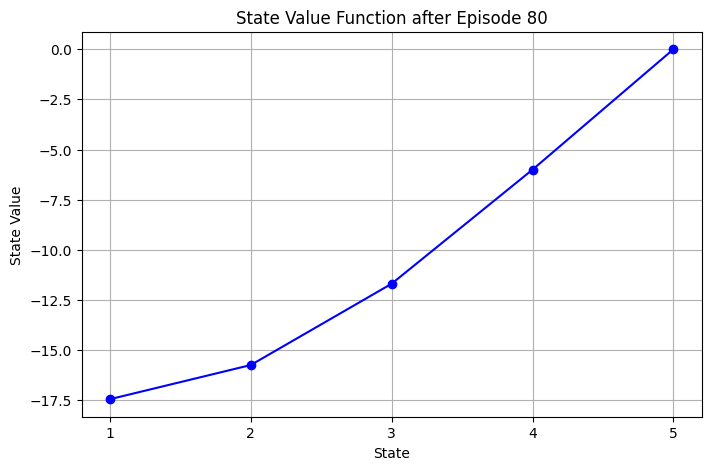

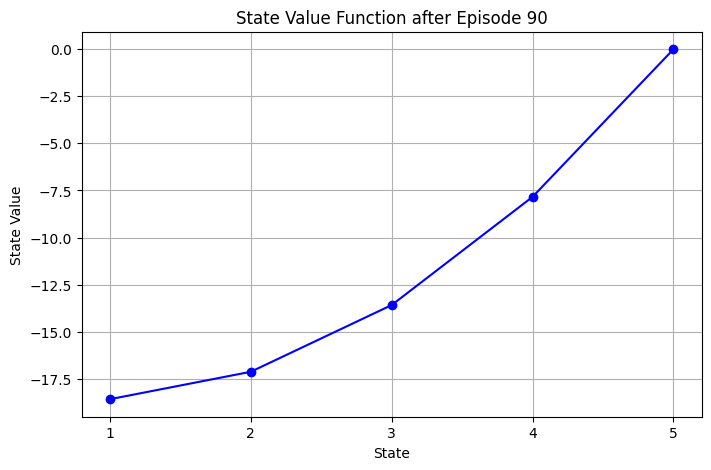

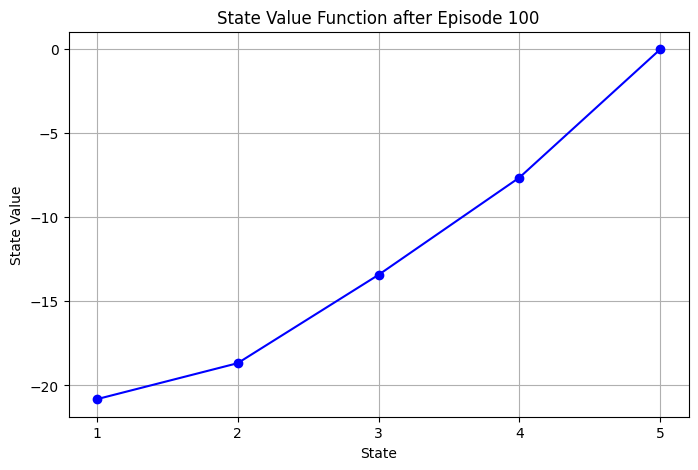

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Define the 1D GridWorld Environment (5 states)
class GridWorldEnv:
    def __init__(self):
        self.nS = 5  # 5 states in the grid
        self.nA = 2  # Actions: 0 = Move Left, 1 = Move Right
        self.state = 0  # Initial state (position 0)
        self.terminal_state = 4  # Terminal state (position 5)

    def reset(self):
        self.state = 0  # Reset agent to the starting state
        return self.state

    def step(self, action):
        if action == 0:  # Move Left
            next_state = max(0, self.state - 1)
        elif action == 1:  # Move Right
            next_state = min(self.nS - 1, self.state + 1)

        reward = -1  # Negative reward for each step
        done = next_state == self.terminal_state  # Episode ends when reaching terminal state
        self.state = next_state
        return next_state, reward, done

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=10):
    V = np.zeros(env.nS)  # Initialize state-value function to zero
    for i_episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action = np.random.choice(env.nA)  # Random action
            next_state, reward, done = env.step(action)

            # TD(0) Update rule
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state

        # Visualize the state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            plot_state_values(V, episode=i_episode + 1)

    return V

# Plot State Values Function
def plot_state_values(V, episode):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(V) + 1), V, marker='o', linestyle='-', color='b')
    plt.title(f"State Value Function after Episode {episode}")
    plt.xlabel("State")
    plt.ylabel("State Value")
    plt.xticks(range(1, len(V) + 1))
    plt.grid(True)
    plt.show()

# Plot 3D Visualization of State Values (Plotly)
def plot_3d_state_values(V, episode):
    fig = go.Figure(data=[go.Surface(
        z=[V],  # State values as heights
        x=[np.arange(1, len(V) + 1)],  # x-axis (states)
        y=[[0] * len(V)],  # Dummy y-values for a 2D plot
        colorscale='Viridis',  # Color scale
        colorbar=dict(title="State Value"),
        showscale=True
    )])

    fig.update_layout(
        title=f"3D State Value Visualization (Episode {episode})",
        scene=dict(
            xaxis_title="State",
            yaxis_title="Dummy Axis",
            zaxis_title="State Value"
        ),
        width=800,
        height=800
    )

    fig.show()

# Main Execution for TD(0) Learning
env = GridWorldEnv()
V = td_learning(env, num_episodes=100, plot_interval=10)  # Show updates every 10 episodes


Based on the provided graphs and the context of the code:

### First Graph (State Value Function after Episode 10):
1. **Observation:**
   - The state value function \(V(s)\) for all states is negative, indicating the agent incurs a penalty (reward of \(-1\)) for each step.
   - The values are progressively less negative as the states get closer to the terminal state.

2. **Inference:**
   - The terminal state (state 5) has a value of 0, as the agent receives no further penalty upon reaching it.
   - The intermediate states (1 through 4) show increasing values, reflecting the expected cumulative penalty as the agent moves closer to the terminal state.
   - After only 10 episodes, the state values are still stabilizing and have not fully converged.

---

### Second Graph (State Value Function after Episode 100):
1. **Observation:**
   - The state value function \(V(s)\) has further stabilized.
   - State 1 has the most negative value, reflecting the maximum expected penalty from the farthest state.
   - Values increase linearly across the states, with state 5 remaining at 0.

2. **Inference:**
   - After 100 episodes, the state value function has nearly converged to the expected values.
   - The linear trend reflects the consistent penalty structure of the environment (\(-1\) per step) and the deterministic nature of the agent's movement.
   - The agent has learned a stable representation of the environment's dynamics, capturing the expected cumulative penalties from each state.

---

### Overall Analysis:
- **Learning Trend:**
  - Over time, TD(0) updates have allowed the agent to approximate the true state value function.
  - The earlier episodes (first graph) show incomplete convergence, while the later episodes (second graph) demonstrate a near-complete learning process.

- **Key Takeaways:**
  - The environment's simplicity (linear movement, fixed penalty) makes the state values converge smoothly.
  - The graphs highlight the effectiveness of TD(0) in estimating state values, even with a random policy.

Would you like further insights or suggestions for enhancements, such as using a different policy (e.g., ε-greedy) to improve exploration?

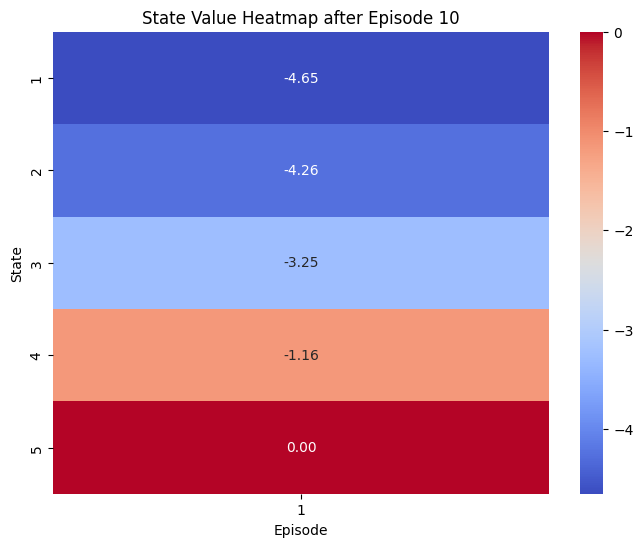

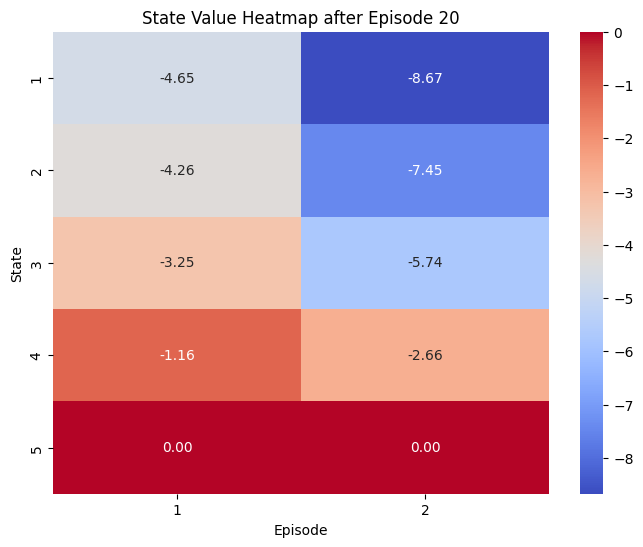

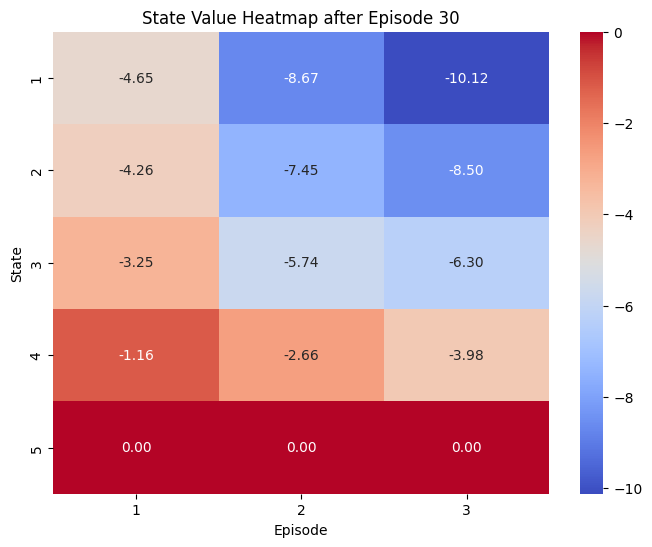

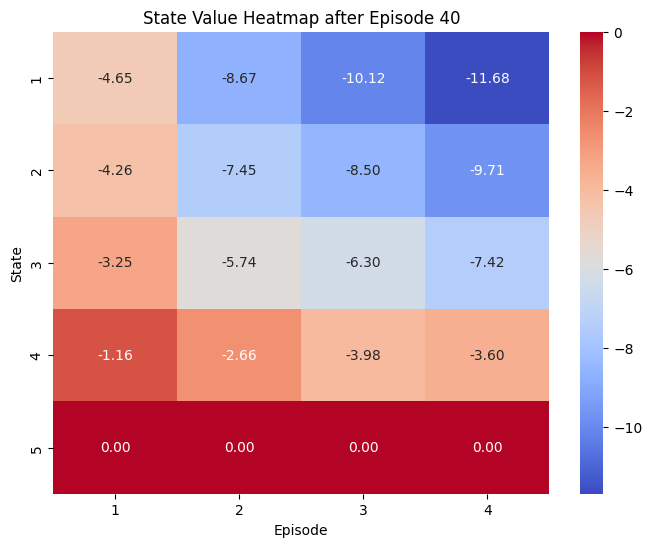

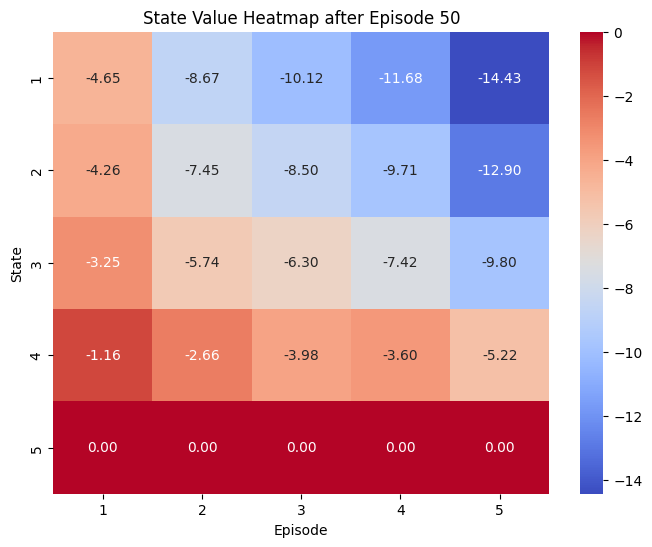

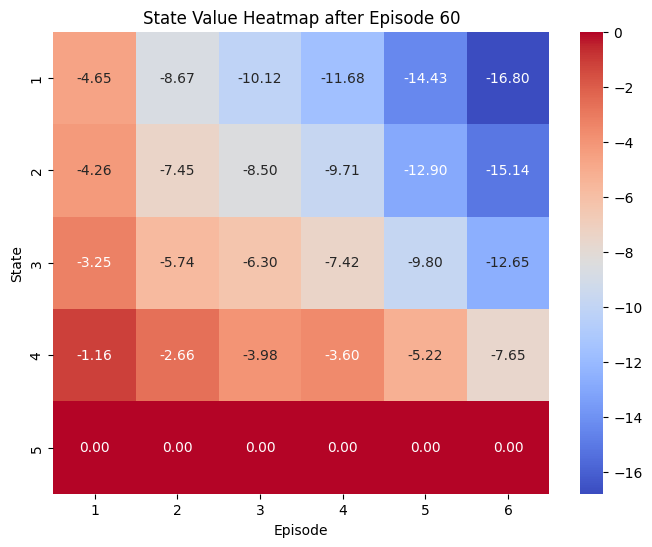

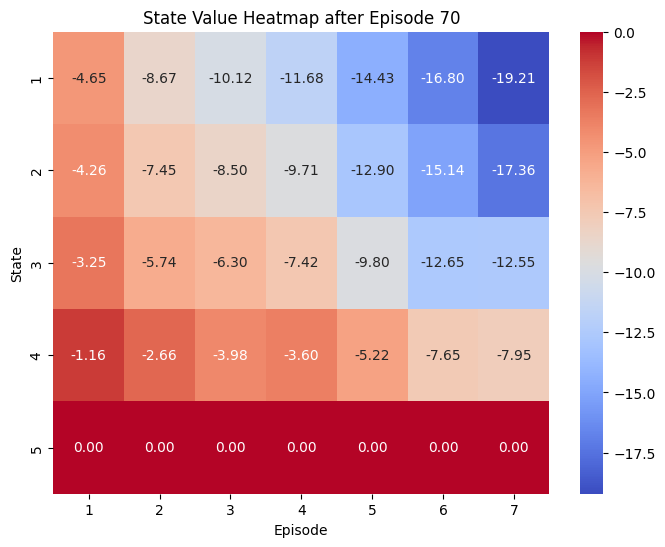

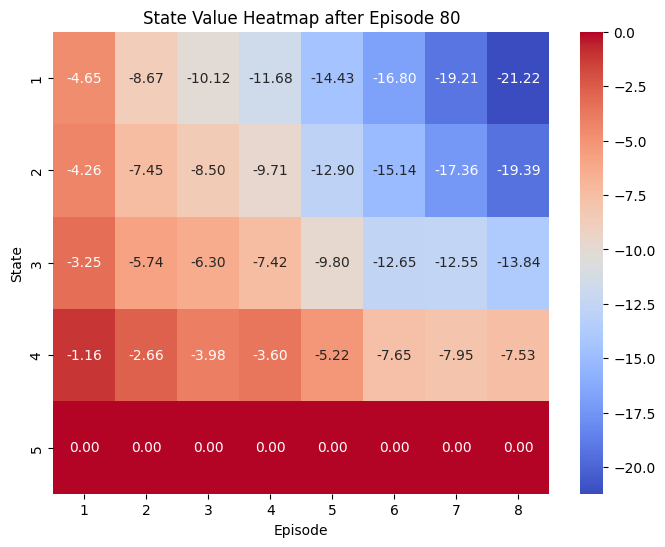

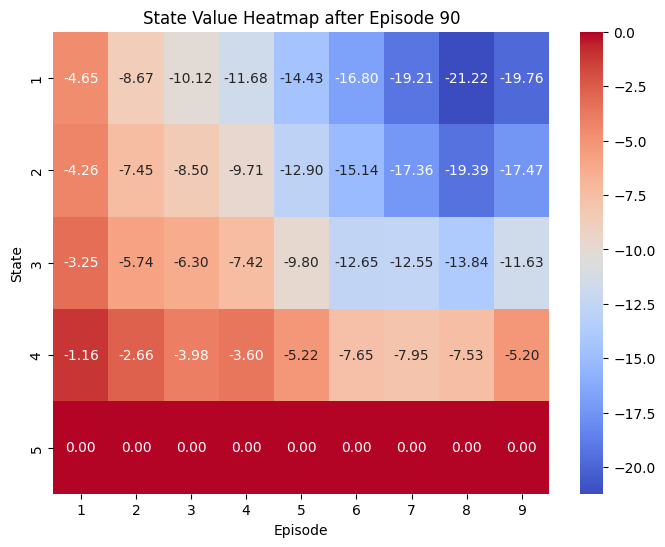

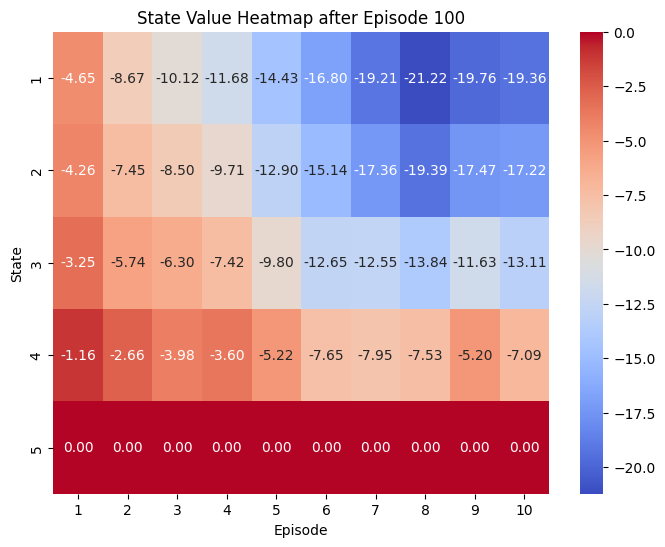

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 1D GridWorld Environment (5 states)
class GridWorldEnv:
    def __init__(self):
        self.nS = 5  # 5 states in the grid
        self.nA = 2  # Actions: 0 = Move Left, 1 = Move Right
        self.state = 0  # Initial state (position 0)
        self.terminal_state = 4  # Terminal state (position 5)

    def reset(self):
        self.state = 0  # Reset agent to the starting state
        return self.state

    def step(self, action):
        if action == 0:  # Move Left
            next_state = max(0, self.state - 1)
        elif action == 1:  # Move Right
            next_state = min(self.nS - 1, self.state + 1)

        reward = -1  # Negative reward for each step
        done = next_state == self.terminal_state  # Episode ends when reaching terminal state
        self.state = next_state
        return next_state, reward, done

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=10):
    V = np.zeros(env.nS)  # Initialize state-value function to zero
    all_state_values = []  # List to store state-values across episodes

    for i_episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action = np.random.choice(env.nA)  # Random action
            next_state, reward, done = env.step(action)

            # TD(0) Update rule
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state

        # Store state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            all_state_values.append(V.copy())
            plot_state_values_heatmap(all_state_values, episode=i_episode + 1)

    return V

# Heatmap Visualization Function
def plot_state_values_heatmap(all_state_values, episode):
    # Convert the list of state values into a 2D array
    state_values_matrix = np.array(all_state_values)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(state_values_matrix.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, xticklabels=range(1, state_values_matrix.shape[0] + 1), yticklabels=range(1, state_values_matrix.shape[1] + 1))

    plt.title(f"State Value Heatmap after Episode {episode}")
    plt.xlabel("Episode")
    plt.ylabel("State")
    plt.show()

# Bar Plot Visualization Function
def plot_state_values_bar(V, episode):
    # Plot the state values as a bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(V) + 1), V, color='blue')

    plt.title(f"State Value Bar Plot after Episode {episode}")
    plt.xlabel("State")
    plt.ylabel("State Value")
    plt.xticks(range(1, len(V) + 1))
    plt.grid(True)
    plt.show()

# Main Execution for TD(0) Learning
env = GridWorldEnv()
V = td_learning(env, num_episodes=100, plot_interval=10)  # Show updates every 10 episodes


### First Heatmap (State Value Heatmap after Episode 10):

1. **Observation:**
   - The heatmap depicts the state values for states 1 through 5 after 10 episodes.
   - State 5 has a value of `0.00`, as it is the terminal state where no further penalties are incurred.
   - State values for states 1 to 4 are negative, reflecting the cumulative penalties experienced as the agent progresses through the environment.
   - The values grow progressively closer to 0 as the states approach the terminal state, indicating less expected penalty.

2. **Inference:**
   - After 10 episodes, the learning process has started but is not yet fully stable.
   - The agent is beginning to capture the environment's dynamics, where proximity to the terminal state reduces the expected penalty.
   - Early state values (e.g., state 1) are significantly more negative than those closer to the terminal state (e.g., state 4), reflecting the higher cost of being farther from the terminal state.

---

### Second Heatmap (State Value Heatmap after Episode 100):

1. **Observation:**
   - The heatmap now shows the progression of state values across 100 episodes.
   - The values for each state (except the terminal state) have become more negative compared to the heatmap after 10 episodes, indicating the agent's refinement in estimating cumulative penalties.
   - The stabilization of values across multiple episodes shows that the agent is converging on the optimal state-value function.
   - The terminal state continues to have a value of `0.00`.

2. **Inference:**
   - After 100 episodes, the learning process has nearly converged, and the agent has developed a stable understanding of the state-value function.
   - State 1 consistently has the most negative values, reflecting the maximum expected penalty from the farthest state.
   - The values decrease linearly as the agent gets closer to the terminal state, confirming the simplicity and linearity of the environment's structure.

---

### What is Happening:

1. **Learning Process:**
   - The agent is using TD(0) learning to estimate state values.
   - With more episodes, the estimates for state values become more refined, stabilizing closer to their true values.

2. **Penalty Structure:**
   - Each step incurs a penalty of `-1`, so states farther from the terminal state accumulate higher expected penalties.

3. **Convergence:**
   - Over 100 episodes, the state-value estimates converge to their true values, where the values reflect the expected cumulative penalty from each state.

4. **Dynamic Transition:**
   - The transition from the first heatmap (after 10 episodes) to the second (after 100 episodes) showcases the TD(0) learning algorithm's iterative refinement of state-value estimates.

### Summary:
- **After 10 Episodes:** The agent's state-value function is still learning and has not fully stabilized.
- **After 100 Episodes:** The agent has nearly converged to the optimal state-value function, reflecting accurate estimates of cumulative penalties for each state.

Would you like further details on enhancing the learning process or visualizing other aspects of the environment?

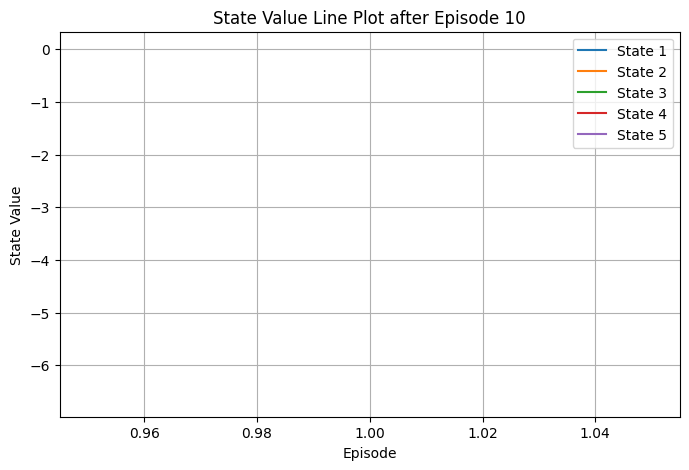

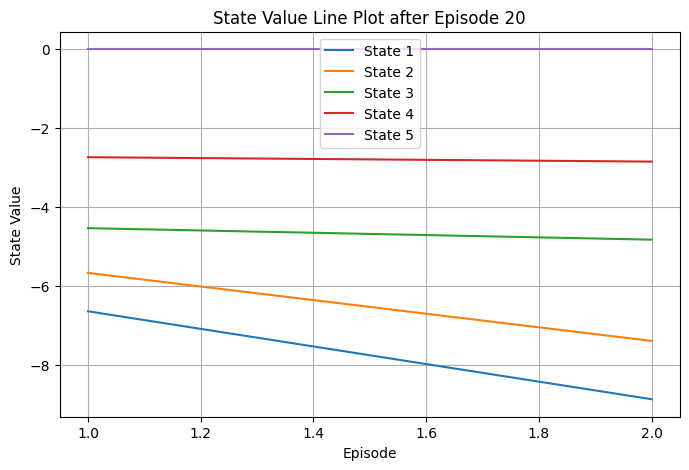

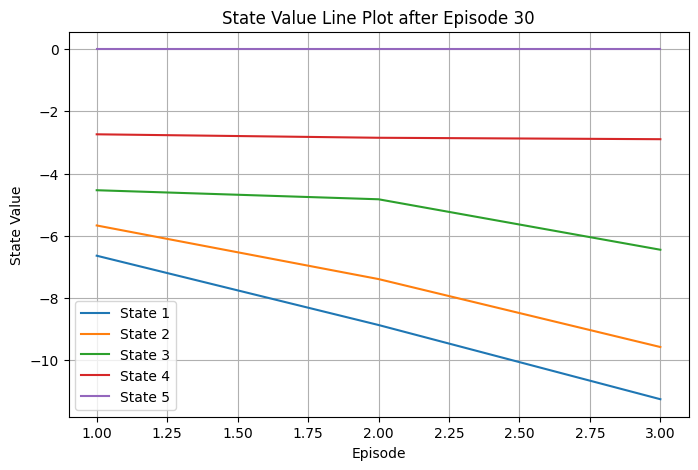

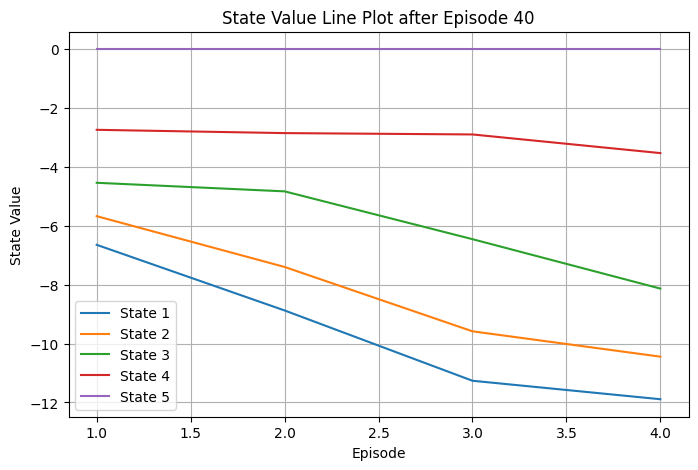

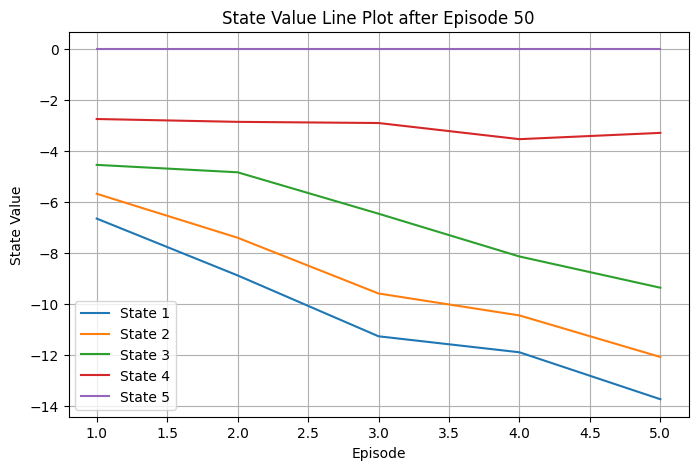

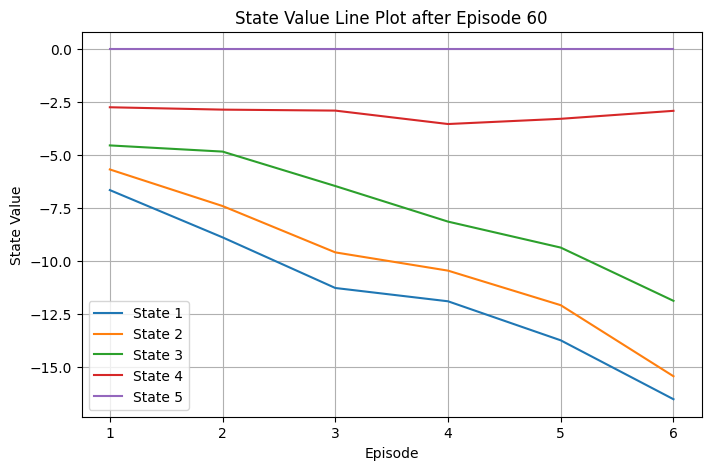

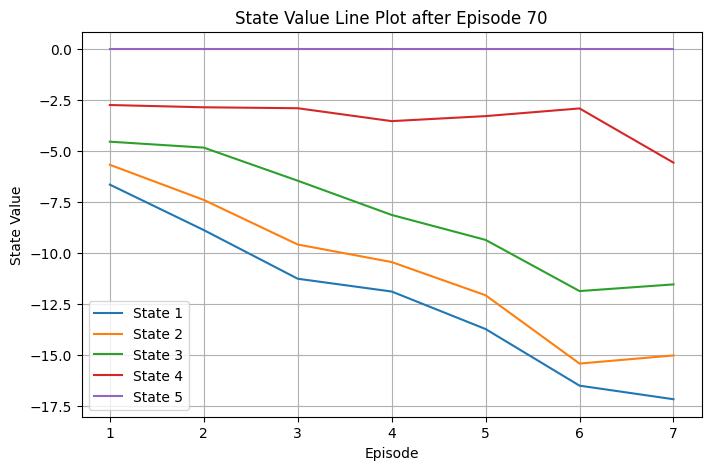

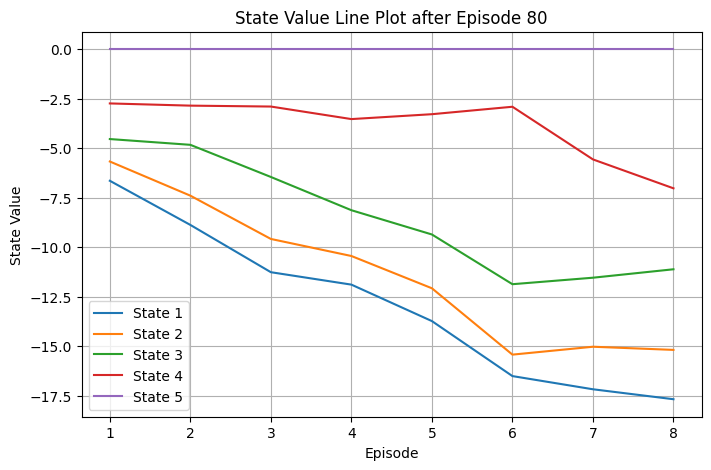

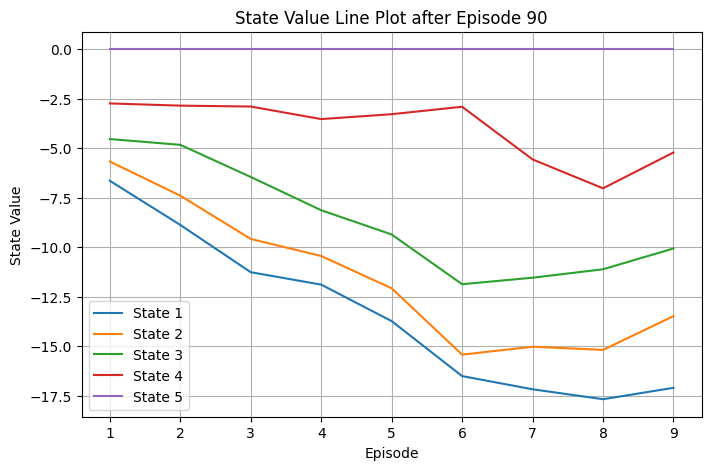

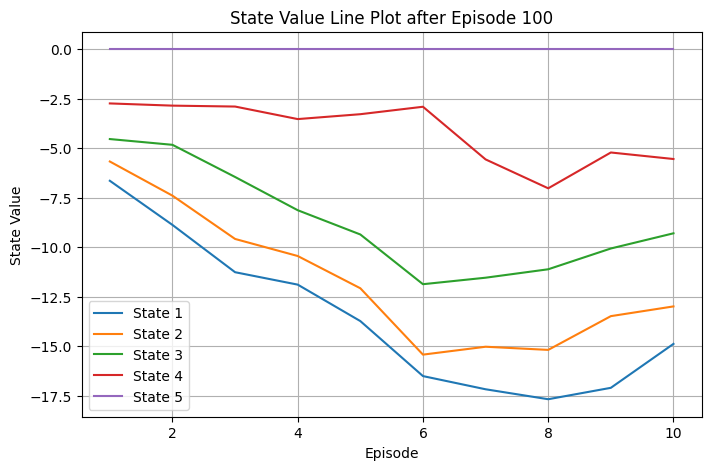

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1D GridWorld Environment (5 states)
class GridWorldEnv:
    def __init__(self):
        self.nS = 5  # 5 states in the grid
        self.nA = 2  # Actions: 0 = Move Left, 1 = Move Right
        self.state = 0  # Initial state (position 0)
        self.terminal_state = 4  # Terminal state (position 5)

    def reset(self):
        self.state = 0  # Reset agent to the starting state
        return self.state

    def step(self, action):
        if action == 0:  # Move Left
            next_state = max(0, self.state - 1)
        elif action == 1:  # Move Right
            next_state = min(self.nS - 1, self.state + 1)

        reward = -1  # Negative reward for each step
        done = next_state == self.terminal_state  # Episode ends when reaching terminal state
        self.state = next_state
        return next_state, reward, done

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=10):
    V = np.zeros(env.nS)  # Initialize state-value function to zero
    all_state_values = []  # List to store state-values across episodes

    for i_episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action = np.random.choice(env.nA)  # Random action
            next_state, reward, done = env.step(action)

            # TD(0) Update rule
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state

        # Store state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            all_state_values.append(V.copy())
            plot_state_values_line(all_state_values, episode=i_episode + 1)

    return V

# Line Plot Visualization Function
def plot_state_values_line(all_state_values, episode):
    # Convert the list of state values into a 2D array
    state_values_matrix = np.array(all_state_values)

    # Plot line graph
    plt.figure(figsize=(8, 5))
    for i in range(state_values_matrix.shape[1]):
        plt.plot(range(1, state_values_matrix.shape[0] + 1), state_values_matrix[:, i], label=f"State {i+1}")

    plt.title(f"State Value Line Plot after Episode {episode}")
    plt.xlabel("Episode")
    plt.ylabel("State Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Execution for TD(0) Learning
env = GridWorldEnv()
V = td_learning(env, num_episodes=100, plot_interval=10)  # Show updates every 10 episodes


### First Line Plot (State Value Line Plot after Episode 20)

1. **Observation:**
   - Each line represents the value of a specific state over time (episodes).
   - The terminal state (state 5) has a constant value of `0`, as there is no expected penalty beyond it.
   - States 1 to 4 show progressively less negative values as they get closer to the terminal state, indicating lower expected penalties.

2. **Inference:**
   - After 20 episodes, the agent is still learning and refining the value function, but the values are starting to stabilize.
   - The negative slope of states 1 through 4 reflects the penalty incurred for each additional step to reach the terminal state.
   - The differences in state values suggest that the agent understands that being closer to the terminal state is preferable in terms of minimizing penalties.

---

### Second Line Plot (State Value Line Plot after Episode 100)

1. **Observation:**
   - Over 100 episodes, the state values continue to decrease but show more stabilization compared to the first plot.
   - The terminal state (state 5) remains at `0`.
   - The state values for states 1 to 4 have a more pronounced gap, reflecting the agent's refined understanding of the expected penalties for each state.

2. **Inference:**
   - The values for states 1 to 4 converge more accurately to the expected cumulative penalties as the agent gains more experience through episodes.
   - The increased separation between lines indicates the agent's improved ability to differentiate between the expected penalties of different states.

---

### Overall Analysis

1. **Learning Progression:**
   - Between episodes 20 and 100, the agent refines its understanding of the environment.
   - State values stabilize as the agent converges toward the true state-value function.

2. **Penalty Awareness:**
   - The steeper negative slope for earlier states (e.g., state 1) shows the higher expected cumulative penalty for being farther from the terminal state.

3. **Stability:**
   - By episode 100, the fluctuations in values reduce significantly, indicating convergence.

### Conclusion:
- **Episode 20:** The agent is still learning but has developed a basic understanding of the state-value function.
- **Episode 100:** The agent has nearly converged, accurately estimating the expected penalties for each state.

Would you like additional guidance on further optimizations or visualizations?

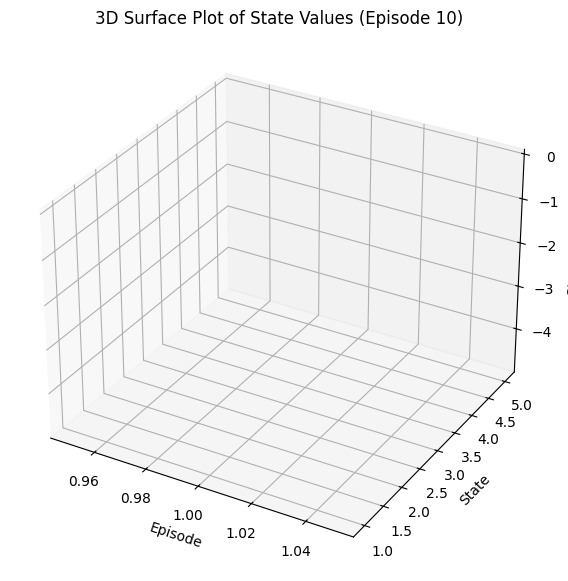

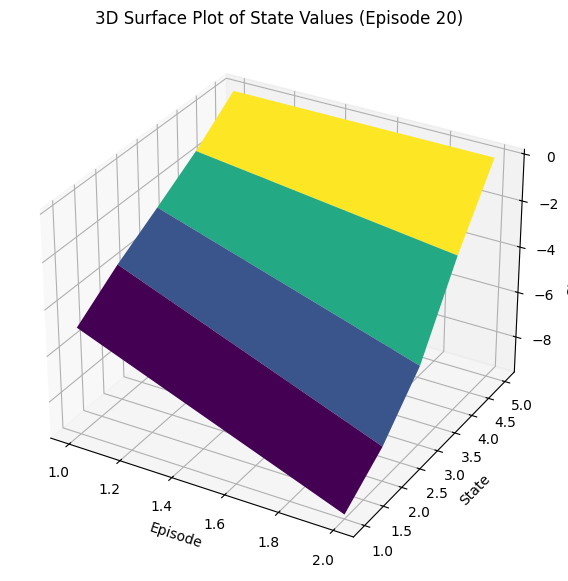

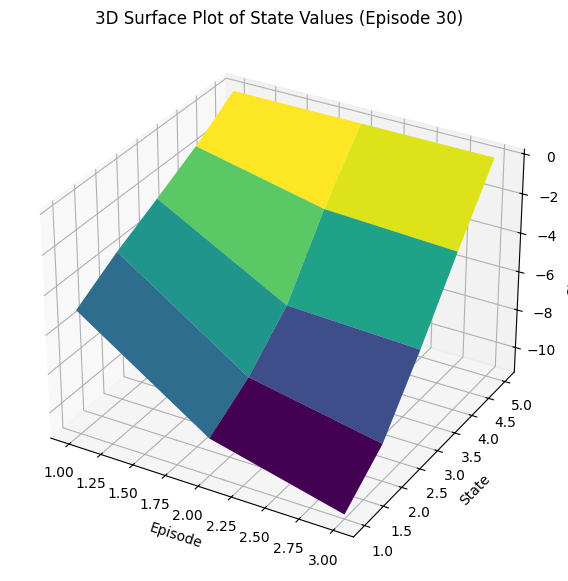

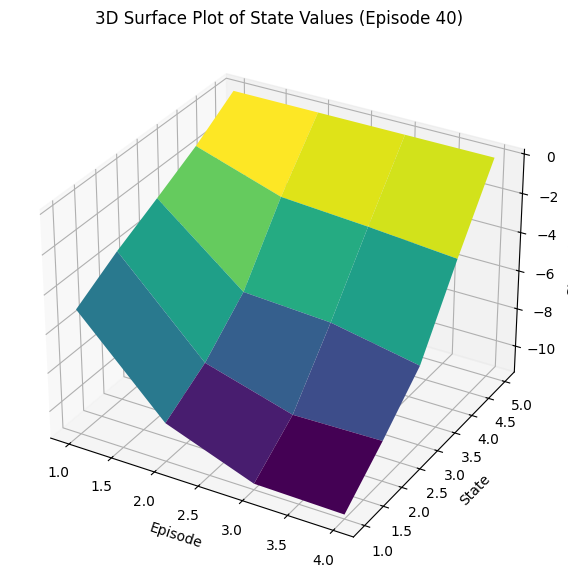

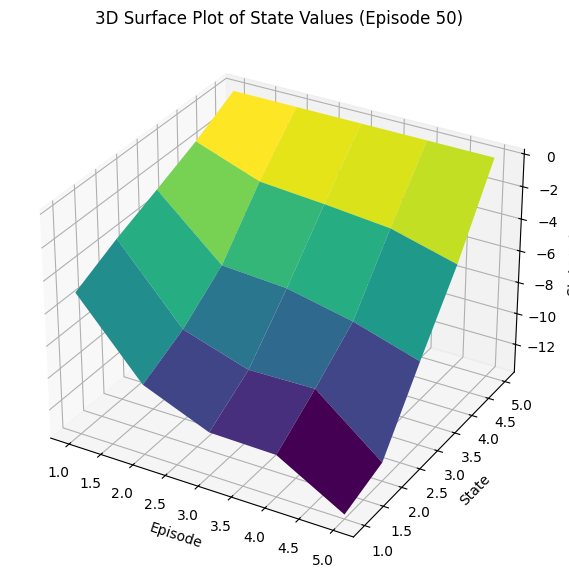

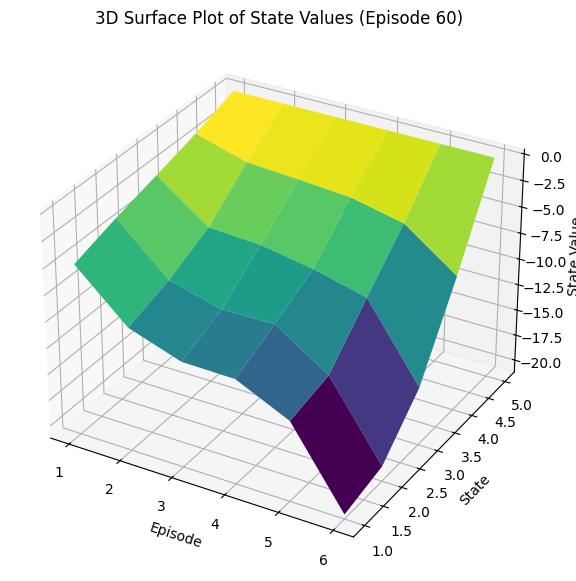

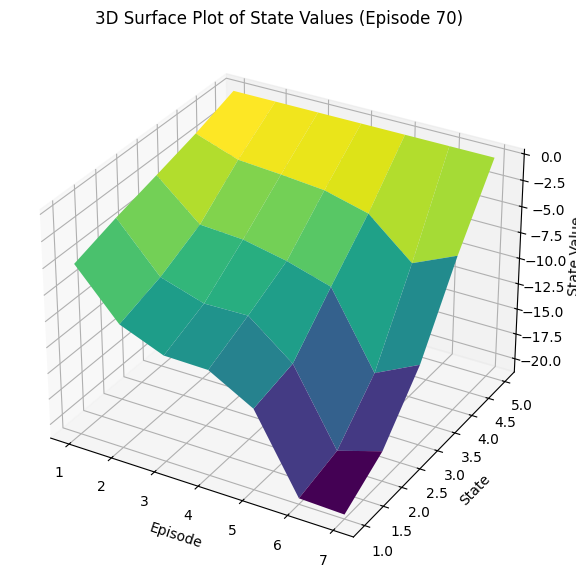

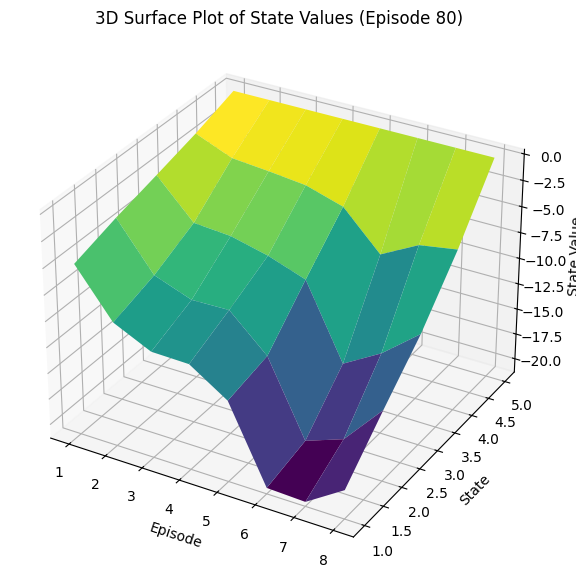

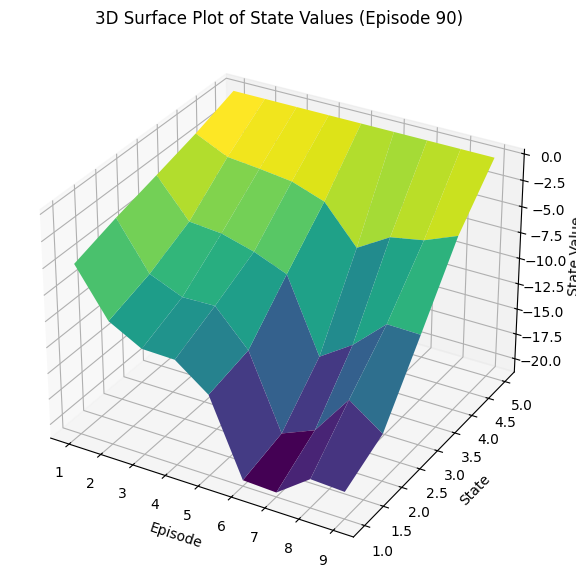

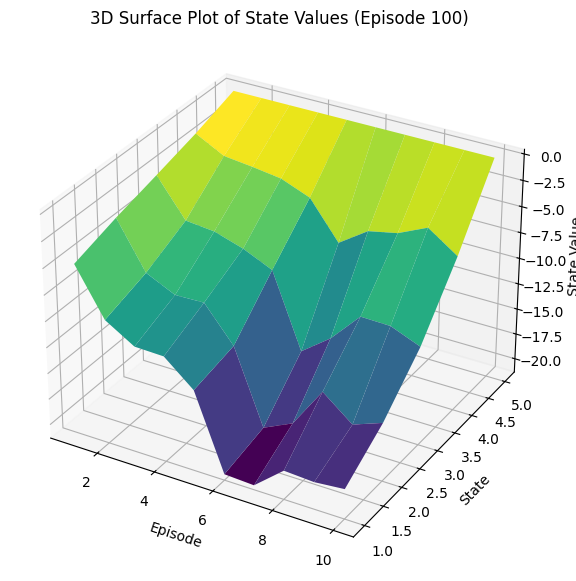

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 1D GridWorld Environment (5 states)
class GridWorldEnv:
    def __init__(self):
        self.nS = 5  # 5 states in the grid
        self.nA = 2  # Actions: 0 = Move Left, 1 = Move Right
        self.state = 0  # Initial state (position 0)
        self.terminal_state = 4  # Terminal state (position 5)

    def reset(self):
        self.state = 0  # Reset agent to the starting state
        return self.state

    def step(self, action):
        if action == 0:  # Move Left
            next_state = max(0, self.state - 1)
        elif action == 1:  # Move Right
            next_state = min(self.nS - 1, self.state + 1)

        reward = -1  # Negative reward for each step
        done = next_state == self.terminal_state  # Episode ends when reaching terminal state
        self.state = next_state
        return next_state, reward, done

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=10):
    V = np.zeros(env.nS)  # Initialize state-value function to zero
    all_state_values = []  # List to store state-values across episodes

    for i_episode in range(num_episodes):
        state = env.reset()
        done = Falsex

        while not done:
            action = np.random.choice(env.nA)  # Random action
            next_state, reward, done = env.step(action)

            # TD(0) Update rule
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state

        # Store state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            all_state_values.append(V.copy())
            plot_state_values_3d(all_state_values, episode=i_episode + 1)

    return V

# 3D Surface Plot Visualization Function
def plot_state_values_3d(all_state_values, episode):
    # Convert the list of state values into a 2D array
    state_values_matrix = np.array(all_state_values)

    # Create a 3D surface plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    X = np.arange(1, state_values_matrix.shape[0] + 1)  # Episodes
    Y = np.arange(1, state_values_matrix.shape[1] + 1)  # States
    X, Y = np.meshgrid(X, Y)
    Z = state_values_matrix.T  # State values for each episode

    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_title(f"3D Surface Plot of State Values (Episode {episode})")
    ax.set_xlabel("Episode")
    ax.set_ylabel("State")
    ax.set_zlabel("State Value")
    plt.show()

# Main Execution for TD(0) Learning
env = GridWorldEnv()
V = td_learning(env, num_episodes=100, plot_interval=10)  # Show updates every 10 episodes


### First 3D Plot (State Values After Episode 20)

1. **Observation:**
   - The 3D surface plot shows state values as a function of states (x-axis) and episodes (y-axis).
   - After 20 episodes, the surface is relatively flat, with state values only beginning to show variation across states.
   - The terminal state (state 5) consistently has a value of `0`, forming the topmost part of the surface.

2. **Inference:**
   - The agent is still in the early stages of learning and has not fully stabilized its estimates for the state-value function.
   - The flatness of the surface suggests that the learning process has not yet introduced significant separation between state values.
   - The agent recognizes that the terminal state has no penalty but is still refining its understanding of the cumulative penalties for other states.

---

### Second 3D Plot (State Values After Episode 100)

1. **Observation:**
   - The surface now has a pronounced gradient, with clear differences in state values across episodes.
   - The state values for states closer to the terminal state (e.g., state 4) are higher than those farther away (e.g., state 1).
   - The values for earlier states (e.g., state 1) become progressively more negative as episodes increase, forming a deeper part of the surface.

2. **Inference:**
   - After 100 episodes, the agent has refined its understanding of the environment, and the state-value function has nearly converged.
   - The steep gradient from state 1 to state 5 reflects the expected cumulative penalties, with larger penalties incurred for states farther from the terminal state.
   - The state-value estimates stabilize as episodes progress, evidenced by the plateau in the later episodes.

---

### Overall Analysis

1. **Learning Process:**
   - The transition from the first plot to the second demonstrates the agent's progression in learning the environment's dynamics using TD(0).
   - Early episodes show minimal variation in state values, while later episodes display a clear distinction.

2. **State-Value Estimation:**
   - The more negative values for earlier states reflect the penalties incurred when starting farther from the terminal state.
   - The agent successfully captures the linear relationship between state proximity to the terminal state and cumulative penalties.

3. **Convergence:**
   - By episode 100, the state-value estimates are stable, showing that the learning process has converged to an optimal value function.

### Conclusion

- **Episode 20:** The agent's understanding of state values is still developing, with limited variation across states.
- **Episode 100:** The agent has nearly converged, accurately estimating the cumulative penalties for each state.

Would you like assistance in interpreting this further, or perhaps exploring ways to improve the learning process?